# Linear Interpolation

我们能想象到的最简单的插值方法就是"连点成线"，即用直线简单地连接我们的数据样本点。

![线性插值示例](linear-interpolation.png)

如我们所见，这种方法只能在端点处得到正确的值（对于一般函数而言），但它有一个很好的特性，就是不会引入任何新的极大值或极小值。


给定一个函数的N个采样点 $(x_i, f_i)$，连接点 $i$ 和 $i+1$ 的插值函数为：

$$f(x) = \frac{f_{i+1} - f_i}{x_{i+1} - x_i} (x - x_i) + f_i$$

其中 $x_i \le x \le x_{i+1}$

对于N个点，我们有 $N-1$ 个插值函数。


## 分段插值

这是一个_分段插值_的例子。我们不试图用单一的多项式拟合所有的点，而是用低阶多项式（在这种情况下是直线）拟合部分点。


示例:

让我们编写一个函数来在区间[0,5]上对函数$f(x) = x \sin(x)$进行采样，然后使用线性插值获取函数值。

我们需要多少个采样点才能获得1%的误差？


In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def f(x):
    return x * np.sin(x)

In [10]:
def sample_function(func, npts, *, xmin=0.0, xmax=10.0):
    xx = np.linspace(xmin, xmax, npts)
    return xx, func(xx)

让我们来看看这个函数和10个样本


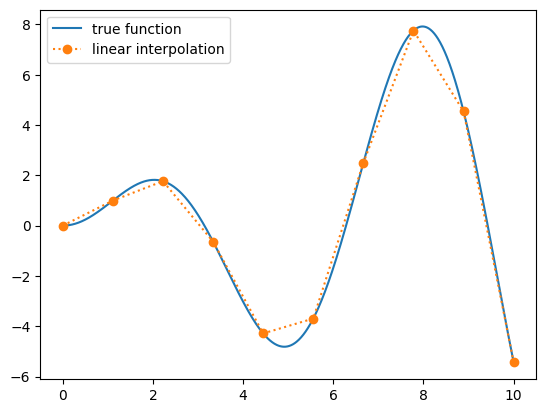

In [11]:
fig, ax = plt.subplots()
xmin = 0.0
xmax = 10.0
N = 10

x_fine = np.linspace(xmin, xmax, 1000)
x_sample, f_sample = sample_function(f, N, xmin=xmin, xmax=xmax)

ax.plot(x_fine, f(x_fine), label="true function")
ax.plot(x_sample, f_sample, marker="o", ls=":", label="linear interpolation")
ax.legend()

现在让我们定义插值函数。该函数将接收函数采样点的位置和对应的函数值（`xv`，`fv`），以及我们想要近似计算底层函数值的位置 `x0`。


In [12]:
def interpolate(x0, xv, fv):
    
    # find first x[i] > x0
    idx = np.argwhere(xv > x0)[0][0]
    
    # we want to use this point and the one to the left
    # we'll shift idx to point to the left point
    idx = max(0, idx-1)
    
    slope = (fv[idx+1] - fv[idx]) / (xv[idx+1] - xv[idx])
    return slope * (x0 - xv[idx]) + fv[idx]

让我们看看 $x_0 = 4.5$ (这是在一个最小值附近)，并尝试不同的点数来测量误差


In [13]:
x0 = 4.5

In [14]:
for n in [5, 10, 20, 40, 80, 160]:
    xv, fv = sample_function(f, n)

    finterp = interpolate(x0, xv, fv)
    fexact = f(x0)
    err = np.abs(finterp - fexact)
    print(f"{n:4} points, error = {err}")

   5 points, error = 0.8624245028923605
  10 points, error = 0.14257394829953363
  20 points, error = 0.1333081368280027
  40 points, error = 0.03204962648664189
  80 points, error = 0.007851522573614211
 160 points, error = 0.0019427475977087383


在这种情况下，当点数超过80个时，我们的误差小于1%。

我们还可以看到，收敛速度似乎略优于二阶收敛。
